In [85]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [86]:
# load data
data=pd.read_csv('Bank Customer Churn Prediction.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [70]:
data.shape

(10000, 12)

In [87]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [89]:
data.nunique()

customer_id         10000
credit_score          460
age                    70
tenure                 11
balance              6382
products_number         4
estimated_salary     9999
churn                   2
country_France          2
country_Germany         2
country_Spain           2
gender_Female           2
gender_Male             2
credit_card_0           2
credit_card_1           2
active_member_0         2
active_member_1         2
dtype: int64

# Data Preprocessing

In [72]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [74]:
data.duplicated().sum()

0

In [75]:
data['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [76]:
data['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [77]:
data['credit_card'].value_counts()

1    7055
0    2945
Name: credit_card, dtype: int64

# Data Visualization

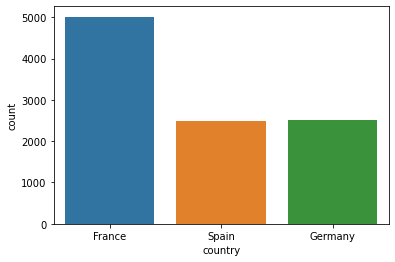

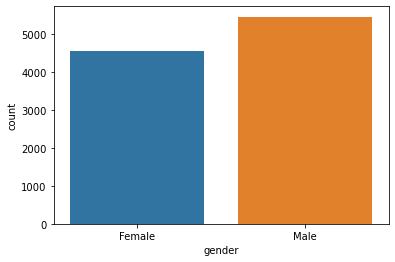

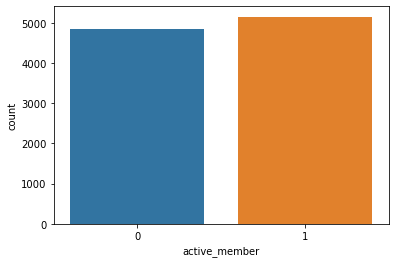

In [80]:
sns.countplot(x="country", data=data)
plt.show()

sns.countplot(x="gender", data=data)
plt.show()

sns.countplot(x="active_member", data=data)
plt.show()


# Target Varibale Analysis

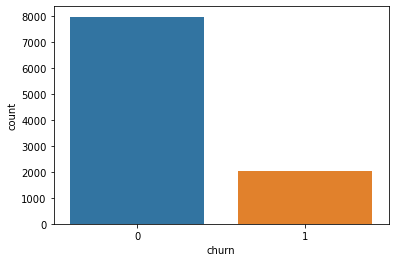

In [90]:
sns.countplot(x="churn", data=data)
plt.show()

# Feature Analysis

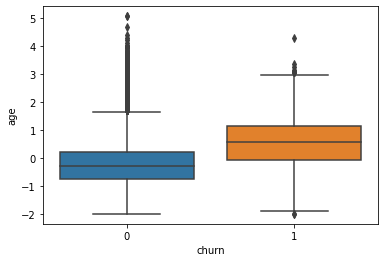

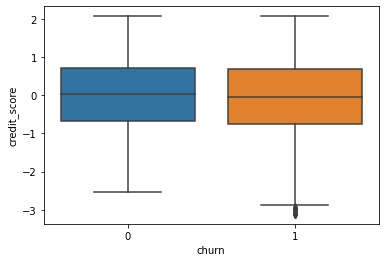

In [93]:
sns.boxplot(x="churn", y="age", data=data)
plt.show()

sns.boxplot(x="churn", y="credit_score", data=data)
plt.show()

In [81]:
data.drop('customer_id', 1, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10820\2505514065.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop('customer_id', 1, inplace=True)


# One-hot encode the categorical columns

In [88]:
data = pd.get_dummies(data, columns=["country", "gender", "credit_card", "active_member"])
# Preprocess the numerical columns, by normalising and scaling them
columns = ["credit_score", "age", "tenure", "balance", "products_number", "estimated_salary"]
scaler = StandardScaler()
data[columns] = scaler.fit_transform(data[columns])

# features and labels

In [41]:
X = data.drop("churn", axis=1)
X

,credit_score,age,tenure,balance,products_number,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male,credit_card_0,credit_card_1,active_member_0,active_member_1
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,1,0,0,1,0,0,1,0,1
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,0,0,1,1,0,1,0,0,1
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,1,0,0,1,0,0,1,1,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,1,0,0,1,0,1,0,1,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,-0.066419,1,0,0,0,1,0,1,1,0
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.027988,1,0,0,0,1,0,1,0,1
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.008643,1,0,0,1,0,1,0,0,1
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,-0.125231,0,1,0,0,1,0,1,1,0


In [42]:
y = data["churn"]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [43]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier Model

In [47]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X_train,y_train)
pred_y=model.predict(X_test)

In [49]:
import sklearn.model_selection as ms
from sklearn.metrics import confusion_matrix
y_train_pred = ms.cross_val_predict(model, X_train, y_train)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5449,  907],
       [ 834,  810]], dtype=int64)

In [50]:
report=classification_report(y_test,pred_y)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.44      0.50      0.47       393

    accuracy                           0.78      2000
   macro avg       0.66      0.67      0.67      2000
weighted avg       0.79      0.78      0.78      2000



# Logistic Regression Model

In [51]:
from sklearn.linear_model import LogisticRegression
model_lm= LogisticRegression()

model_lm.fit(X_train,y_train)
pred_y=model_lm.predict(X_test)

In [52]:
import sklearn.model_selection as ms
from sklearn.metrics import confusion_matrix
y_train_pred = ms.cross_val_predict(model_lm, X_train, y_train)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[6125,  231],
       [1287,  357]], dtype=int64)

In [53]:
report=classification_report(y_test,pred_y)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



# Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train,y_train)
pred_y=model.predict(X_test)

In [58]:
import sklearn.model_selection as ms
from sklearn.metrics import confusion_matrix
y_train_pred = ms.cross_val_predict(model_lm, X_train, y_train)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[6125,  231],
       [1287,  357]], dtype=int64)

In [59]:
report=classification_report(y_test,pred_y)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



# Gradient Boosting

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [62]:
import sklearn.model_selection as ms
from sklearn.metrics import confusion_matrix
y_train_pred = ms.cross_val_predict(model_lm, X_train, y_train)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[6125,  231],
       [1287,  357]], dtype=int64)

In [63]:
report=classification_report(y_test,pred_y)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [64]:
results = pd.DataFrame({
    'Model': [ 'Decision Tree Classifier','Logistic Regression', 'Random Forest Classifier','Gradient Boosting'],
    'Score': [0.78,0.81,0.87,0.87]
})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
0.87,Random Forest Classifier
0.87,Gradient Boosting
0.81,Logistic Regression
0.78,Decision Tree Classifier
